In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
model = keras.models.load_model('best_CNN_model.h5')

In [3]:
model.layers

In [4]:
# weigth 조사

conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.02637677 0.23920912


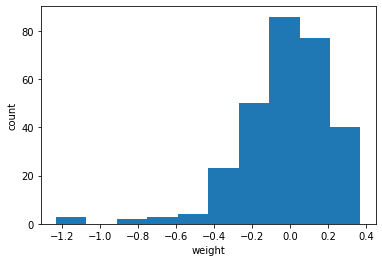

In [6]:
# 가중치 분포 확인

import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

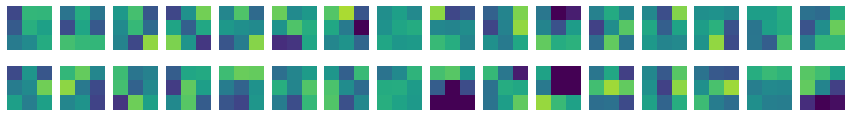

In [7]:
# 32개 kernel 출력

fig, axs = plt.subplots(2, 16, figsize= (15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:, :, 0, i*16 + j], vmin= -0.5, vmax= 0.5)
        axs[i,j].axis('off')
        
plt.show()

In [9]:
# Non training CNN
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size= 3, activation= 'relu', padding= 'same', input_shape= (28, 28, 1)))

In [10]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [11]:
no_train_weights= no_training_conv.weights[0].numpy()
print(no_train_weights.mean(), no_train_weights.std())

-0.009393991 0.08104291


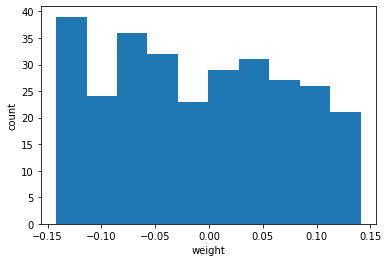

In [12]:
plt.hist(no_train_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

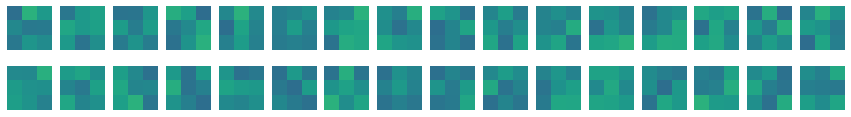

In [13]:
# Non train model plot

fig, axs = plt.subplots(2, 16, figsize= (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_train_weights[:,:,0,i*16 + j], vmin= -0.5, vmax= 0.5)
        axs[i,j].axis('off')
        
plt.show()

In [14]:
# model 객체 
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [15]:
# model 객체와 첫 번째 Conv2D output 연결 모델
conv_acti = keras.Model(model.input, model.layers[0].output)

# conv_acti.predict => 첫 번째 Conv2D 층의 출력 (feature map) 반환

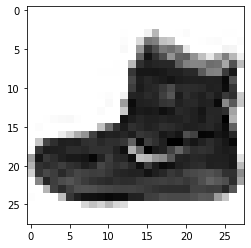

In [16]:
# 특성 맵 시각화

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap= 'gray_r')
plt.show()

In [17]:
# 첫 번째 Conv2D 층에 주입하여 특성맵 출력

inputs = train_input[0:1].reshape(-1, 28, 28, 1) /255.0
feature_maps = conv_acti(inputs)

In [20]:
print(feature_maps.shape)

(1, 28, 28, 32)


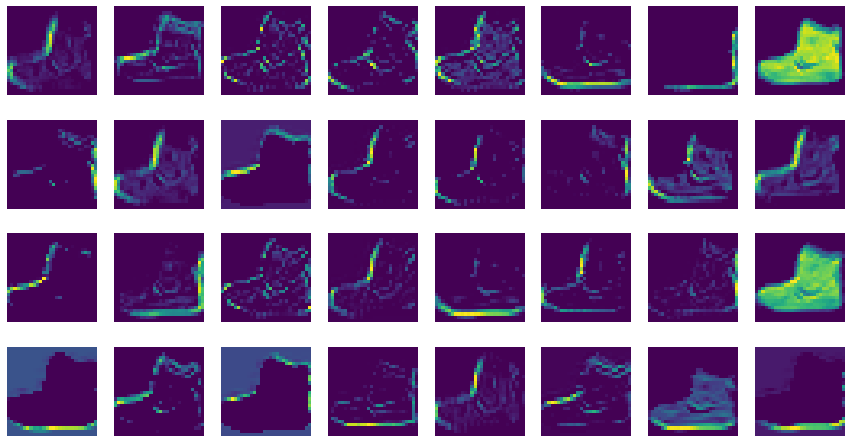

In [23]:
fig, axs = plt.subplots(4, 8, figsize= (15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8+ j])
        axs[i, j].axis('off')
        
plt.show()

In [24]:
# model 객체와 두 번째 Conv2D output 연결 모델
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [25]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [26]:
print(feature_maps.shape)

(1, 14, 14, 64)


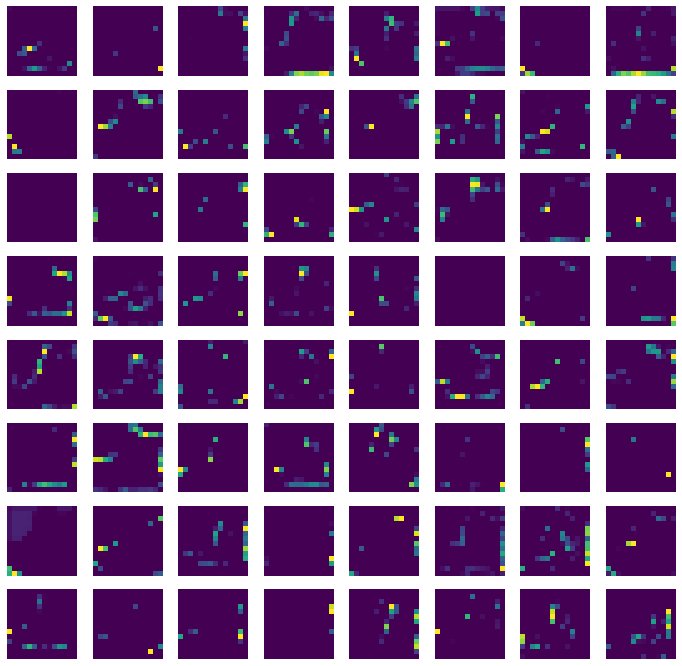

In [27]:
fig, axs = plt.subplots(8, 8, figsize= (12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8+ j])
        axs[i, j].axis('off')
        
plt.show()